In [1]:
import warnings
warnings.simplefilter('ignore')

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotnine as pln
%matplotlib inline
sns.set_style('whitegrid')

reviews = pd.read_csv("../../input/wine-reviews/winemag-data_first150k.csv", index_col=0)
reviews.head(10)

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
5,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,95,73.0,Northern Spain,Toro,NaN,Tinta de Toro,Numanthia
6,Spain,Slightly gritty black-fruit aromas include a s...,San Román,95,65.0,Northern Spain,Toro,NaN,Tinta de Toro,Maurodos
7,Spain,Lush cedary black-fruit aromas are luxe and of...,Carodorum Único Crianza,95,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
8,US,This re-named vineyard was formerly bottled as...,Silice,95,65.0,Oregon,Chehalem Mountains,Willamette Valley,Pinot Noir,Bergström
9,US,The producer sources from two blocks of the vi...,Gap's Crown Vineyard,95,60.0,California,Sonoma Coast,Sonoma,Pinot Noir,Blue Farm


## Countplot

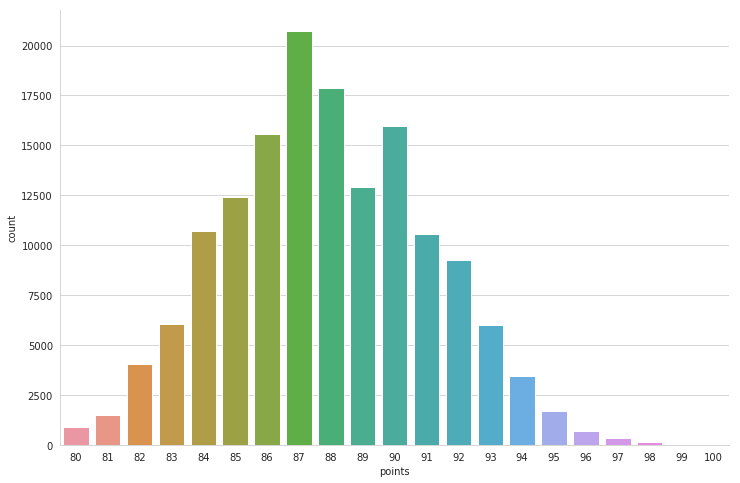

In [2]:
plt.figure(figsize=(12, 8))
_ = sns.countplot(reviews['points'])
sns.despine()

## KDE Plot

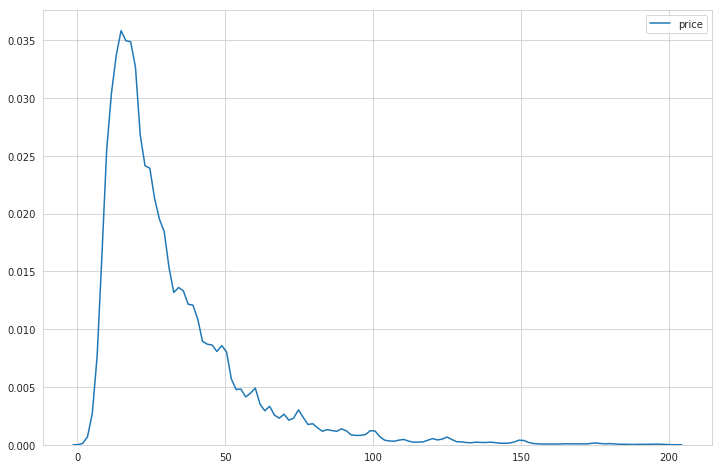

In [3]:
plt.figure(figsize=(12, 8))
_ = sns.kdeplot(reviews.query('price < 200').price)

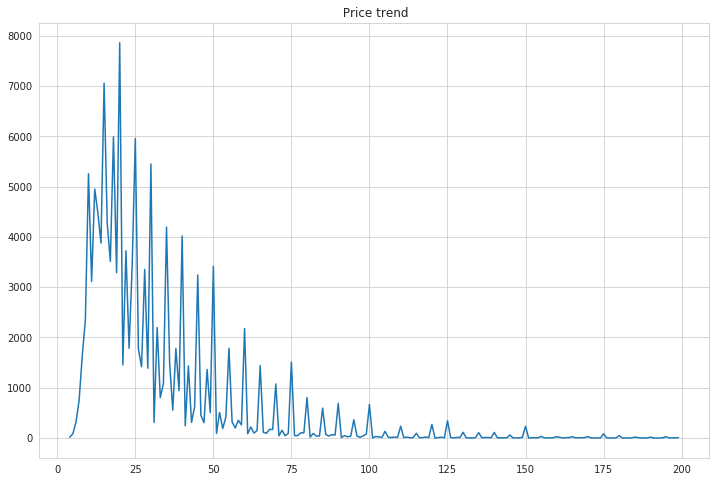

In [4]:
plt.figure(figsize=(12, 8))
ax = reviews[reviews['price'] < 200]['price'].value_counts().sort_index().plot.line()
_ = ax.set_title(" Price trend")

/opt/conda/lib/python3.6/site-packages/seaborn/distributions.py:679: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


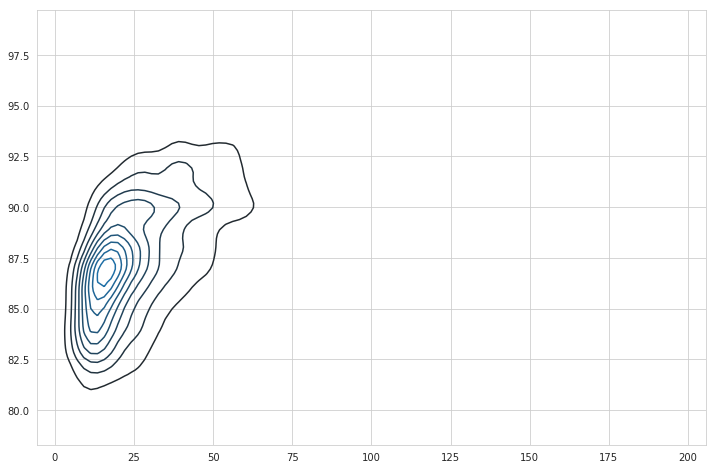

In [5]:
plt.figure(figsize=(12, 8))
_ = sns.kdeplot(reviews[reviews['price'] < 200].loc[:, ['price', 'points']].dropna().sample(5000))

## Distplot

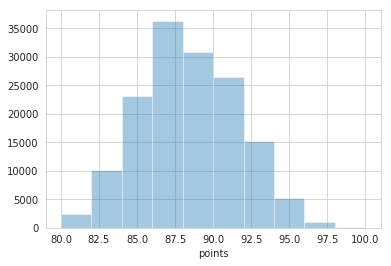

In [6]:
_ = sns.distplot(reviews['points'], bins=10, kde=False)

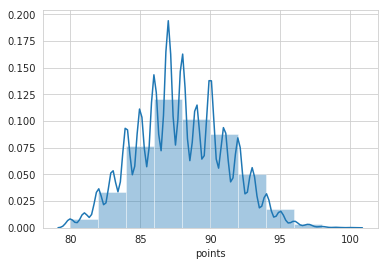

In [7]:
_ = sns.distplot(reviews['points'], bins=10, kde=True)

## Scatterplot and hexplot

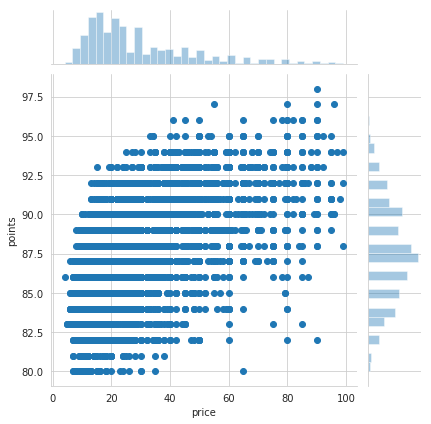

In [8]:
_ = sns.jointplot(x='price', y='points', data=reviews[reviews['price'] < 100].sample(5000))

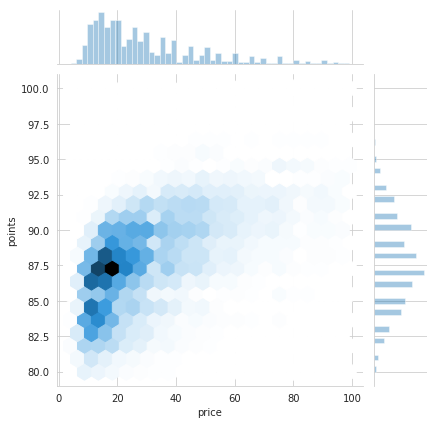

In [9]:
_ = sns.jointplot(x='price', y='points', data=reviews[reviews['price'] < 100], kind='hex', gridsize=20)

## Boxplot and violin plot

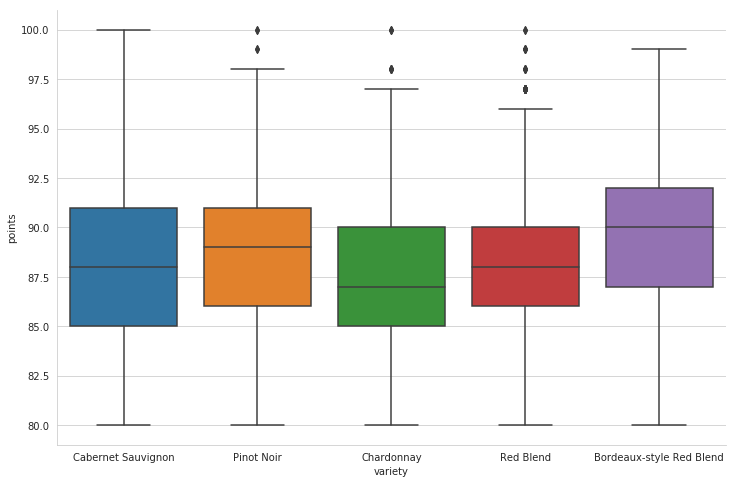

In [10]:
df = reviews[reviews.variety.isin(reviews.variety.value_counts().head(5).index)]

plt.figure(figsize=(12,8))
_ = sns.boxplot(
    x='variety',
    y='points',
    data=df
)
sns.despine()

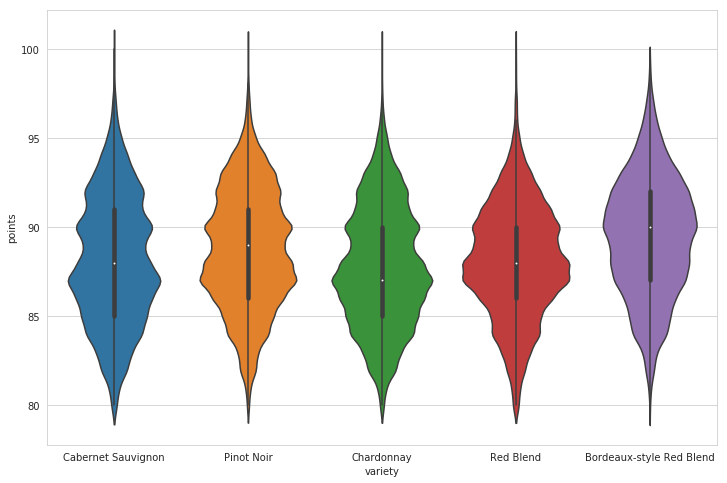

In [11]:
plt.figure(figsize=(12,8))
_ = sns.violinplot(
    x='variety',
    y='points',
    data=reviews[reviews.variety.isin(reviews.variety.value_counts()[:5].index)]
)

## Examples

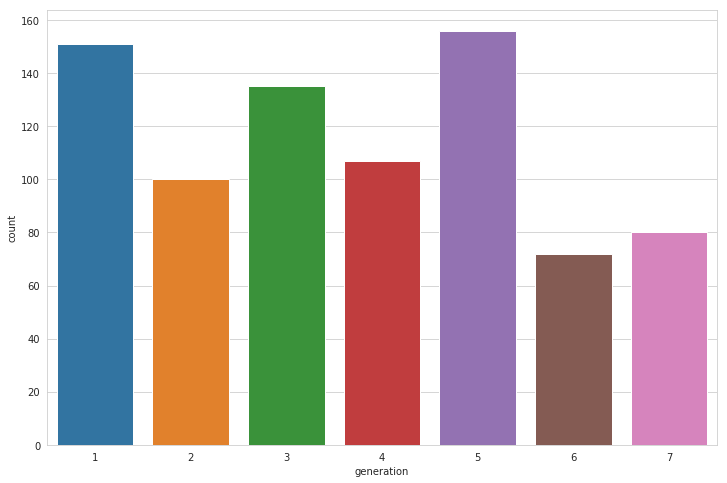

In [12]:
pokemon = pd.read_csv("../../input/pokemon/pokemon.csv", index_col=0)
pokemon.head()

plt.figure(figsize=(12,8))
_ = sns.countplot(pokemon['generation'])

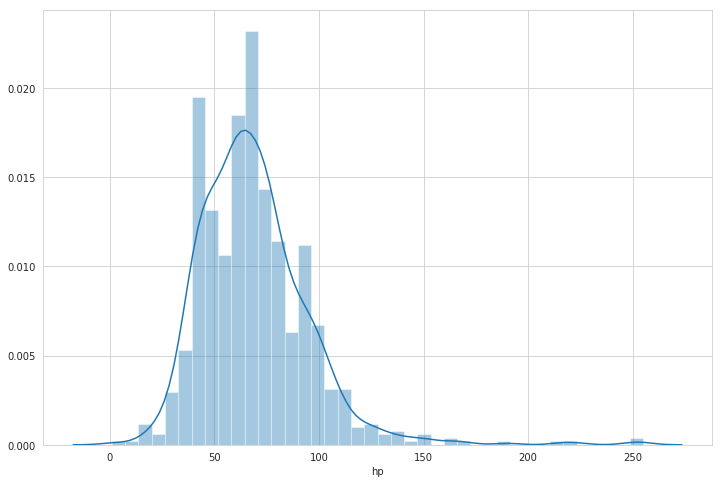

In [13]:
plt.figure(figsize=(12,8))
_ = sns.distplot(pokemon['hp'])

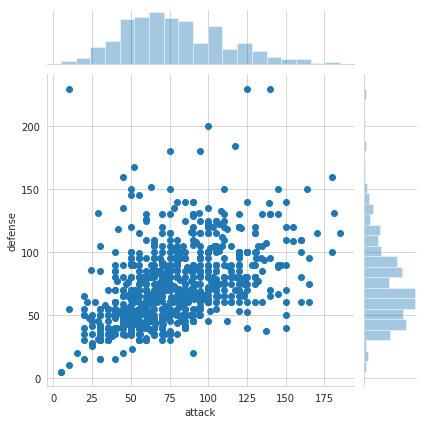

In [14]:
_ = sns.jointplot(x='attack', y='defense', data=pokemon)

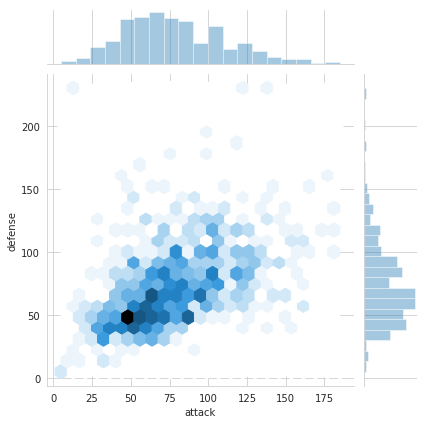

In [15]:
_ = sns.jointplot(x='attack', y='defense', data=pokemon, kind='hex')

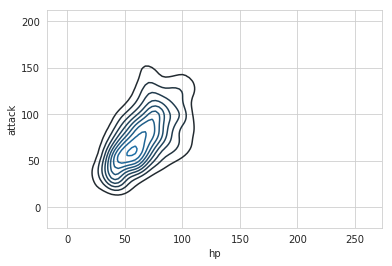

In [16]:
_ = sns.kdeplot(pokemon['hp'], pokemon['attack'])

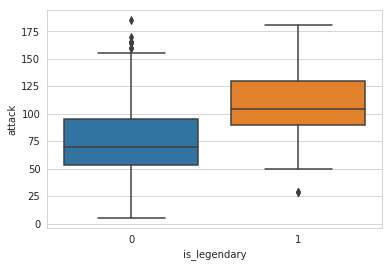

In [17]:
_ = sns.boxplot(x='is_legendary', y='attack', data=pokemon)